In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io
from modules import vascular_data as sv
from modules import sv_image

In [141]:
EXT         = 160
SPACING     = 0.029
W           = EXT*SPACING/2

#MODEL = "0110"

#PATH = "aorta"
#PATH = "right_iliac"

MODEL = "0144"

#PATH = "aorta"
#PATH = "celiac_hepatic"
#PATH = "celiac_splenic"
#PATH = "ext_iliac_left"
#PATH = "renal_left"
#PATH = "renal_right"
PATH = "SMA"

gen = "1"

config_fn = "/home/marsdenlab/projects/seg_regression/scripts/\
config_segment/"+MODEL+"/plot/"+PATH+"/"+gen+".json"

config = io.load_json(config_fn)

PATH_FN     = config['path_files']
IMAGE_FN    = config['image_fn']
GROUP_FNS   = config['group_files']

if "colors" in config:
    COLORS = config['colors']
else:
    COLORS = [config['color']]*len(GROUP_FNS)
    
OUT_DIR     = config['out_dir']

In [142]:
io.rmdir(OUT_DIR)
io.mkdir(OUT_DIR)

In [143]:
image = sv_image.Image(IMAGE_FN)
image.set_spacing(SPACING)
image.set_reslice_ext(EXT)

In [144]:
path = io.parsePathPointsFile(PATH_FN)
path_norm = []
for p in path:
    id = str(int(p[0]))
    x  = p[1:4]
    n  = p[4:7]
    t = p[7:10]
    path_norm.append( (id, x, n, t) )


In [145]:
groups = [io.load_json(g) for g in GROUP_FNS]

In [146]:
norm_groups = []
for g in groups:
    d = []
    for p in path_norm:
        try:
            id,x,n,t = p
            c  = np.array(g[id])
            c_ = np.vstack((c,c[0]))

            c2d = sv.normalizeContour(c_,x,n,t)/W
        except:
            pass
        d.append(c2d)
    norm_groups.append(d)

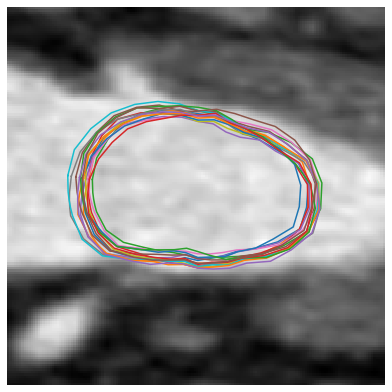

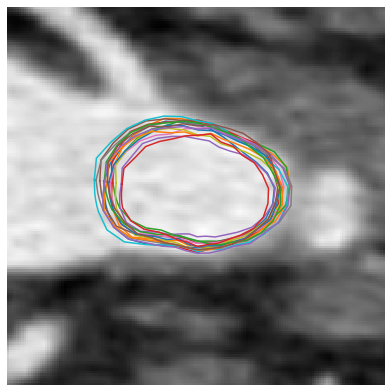

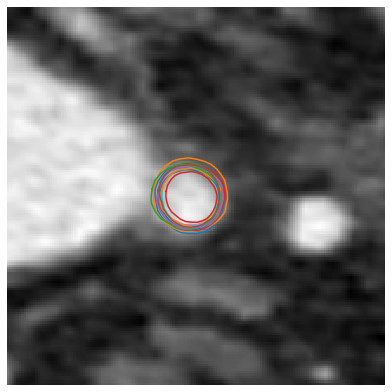

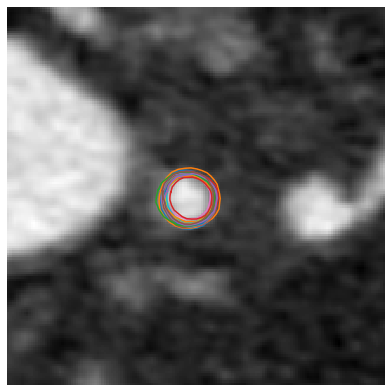

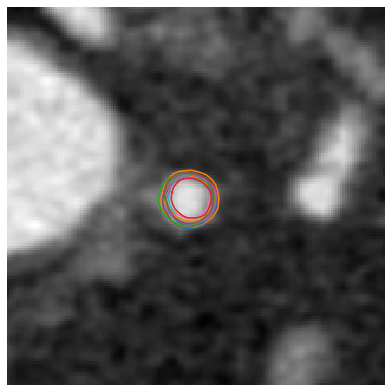

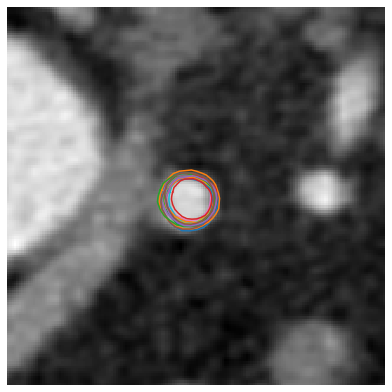

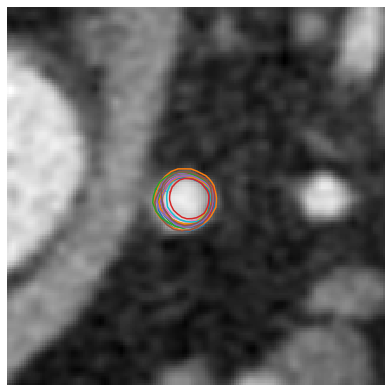

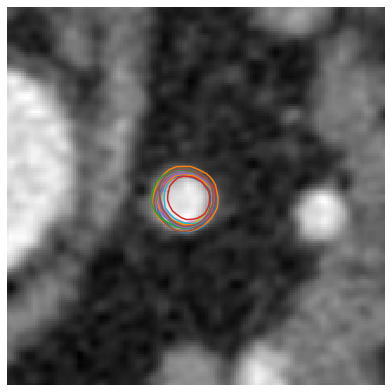

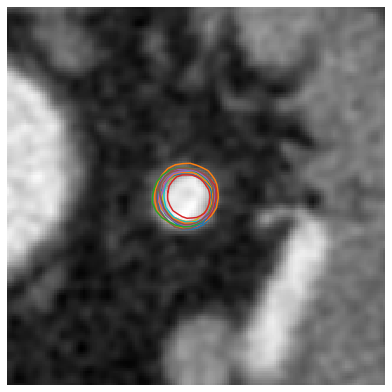

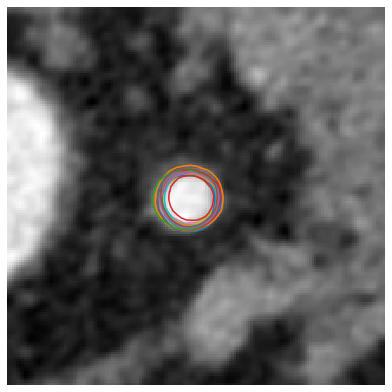

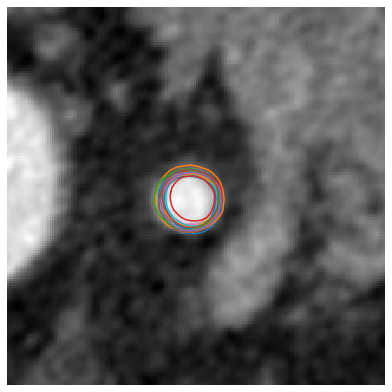

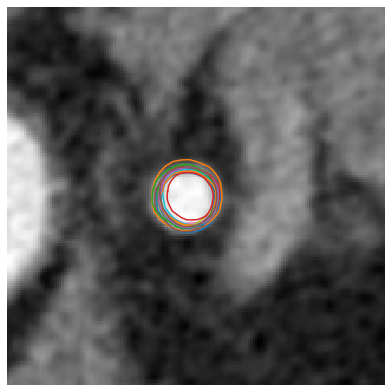

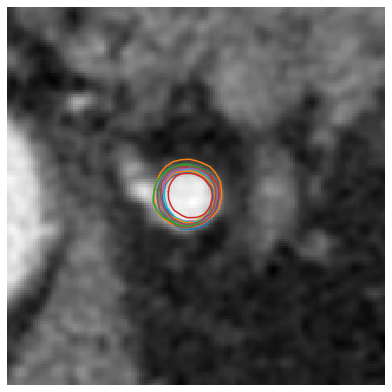

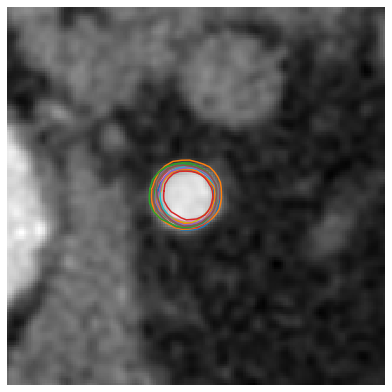

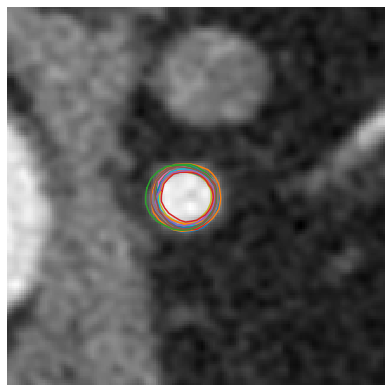

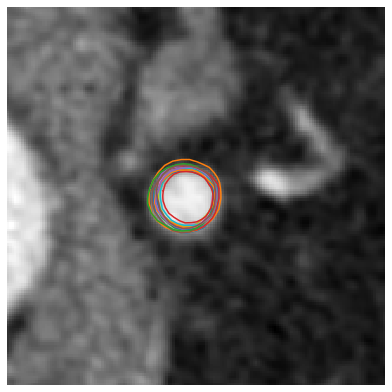

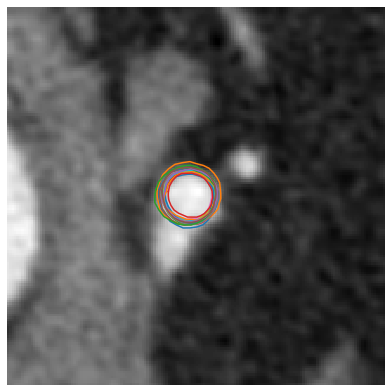

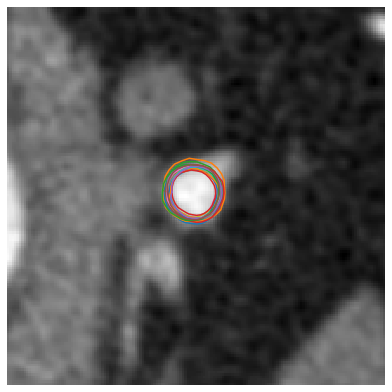

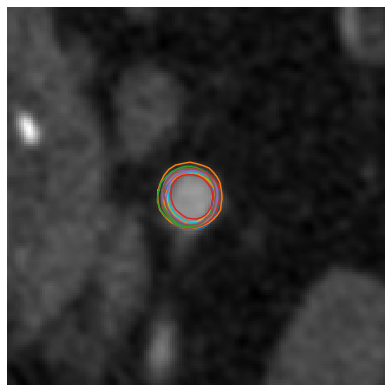

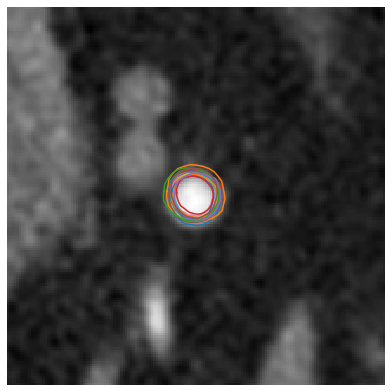

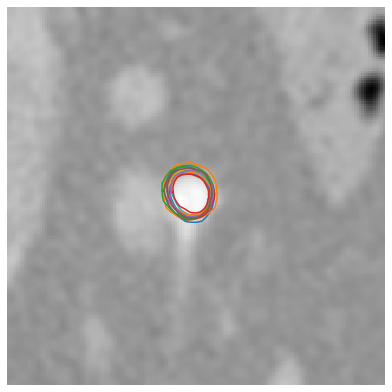

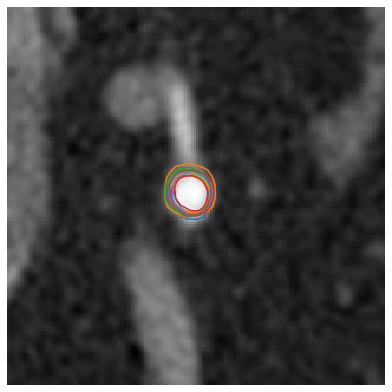

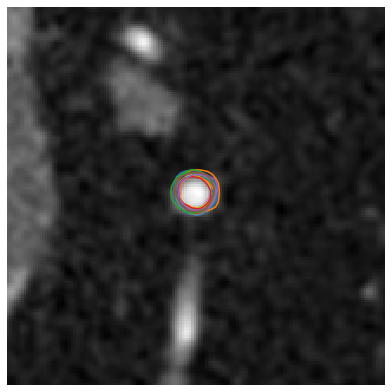

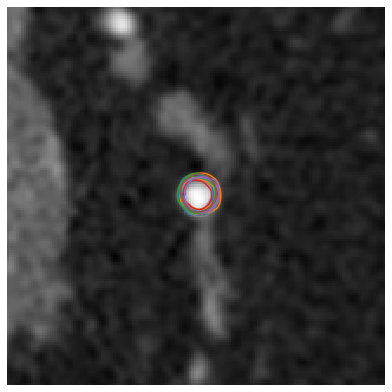

In [147]:
for i, p in enumerate(path_norm):
    id,x,n,t = p

    img_fn = OUT_DIR+'/'+id
    
    img = image.get_reslice(x,n,t)

    plt.figure(figsize=(6,6))
    plt.imshow(img,cmap='gray',extent=[-1,1,-1,1])

    for j,contour_list in enumerate(norm_groups):
        c = contour_list[i]
        #plt.plot(c[:,0],c[:,1],color=COLORS[j])
        plt.plot(c[:,0],c[:,1])

    plt.tight_layout()
    plt.axis('off')
    plt.savefig(img_fn+'.png',dpi=200)
    plt.savefig(img_fn+'.pdf',dpi=200)
    plt.show()
    plt.close()

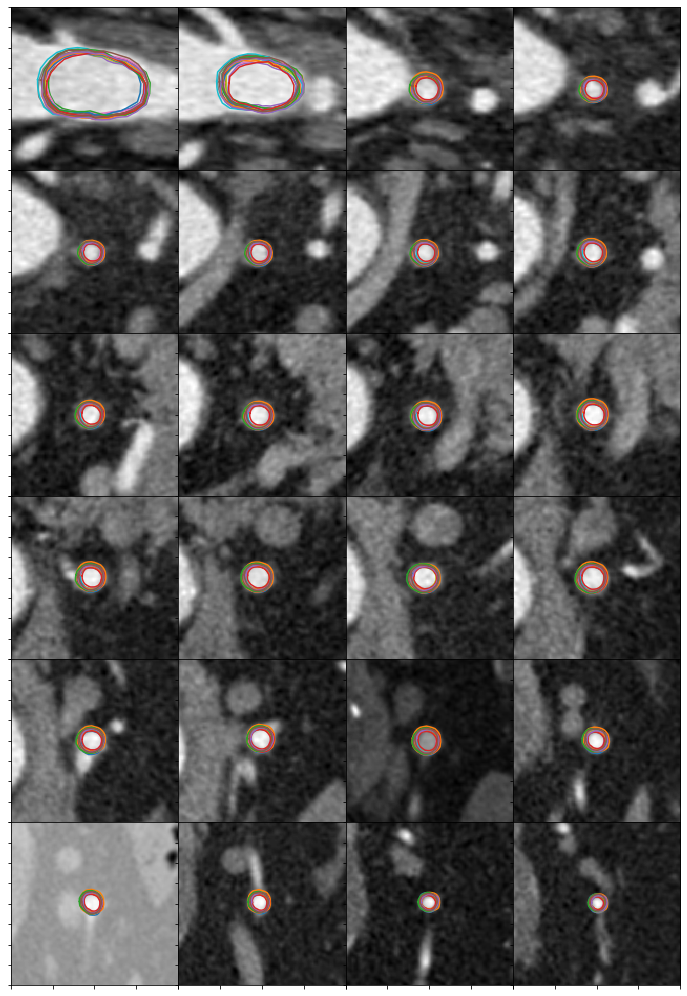

In [148]:
Nim   = len(path_norm)
start = 2
end   = 2

Wplot = int(np.sqrt(Nim))
Hplot = int(Nim/Wplot)
Size  = 3
count = 0
f, axarr = plt.subplots(Hplot, Wplot, figsize=(Wplot*Size,Hplot*Size))
for i in range(Hplot):
    for j in range(Wplot):
        
        id,x,n,t = path_norm[count]

        img = image.get_reslice(x,n,t)

        axarr[i, j].imshow(img, extent=[-1,1,-1,1], cmap='gray')
        axarr[i,j].set_aspect('auto')
        axarr[i,j].grid(False)
        
        # Fine-tune figure; hide x ticks for top plots and y ticks for right plots
        plt.setp(axarr[i,j].get_xticklabels(), visible=False)
        plt.setp(axarr[i,j].get_yticklabels(), visible=False)

        for k,contour_list in enumerate(norm_groups):
            c = contour_list[count]
            #plt.plot(c[:,0],c[:,1],color=COLORS[j])
            axarr[i,j].plot(c[:,0],c[:,1])
        count += 1

plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('mnist_weights.pdf', dpi=600)
plt.grid(False)
plt.savefig(OUT_DIR+'_combined.png',dpi=200)
plt.savefig(OUT_DIR+'_combined.pdf',dpi=200)
plt.show()
plt.close()        